In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pltlatexify import latexify, format_axes

In [67]:
df = pd.read_csv('wandb_export_2022-03-19T20_25_34.798+01_00.csv')

In [68]:
df

,Name,_wandb,val/text_to_image_R@10,val/image_to_text_R@10
0,BERT_chunked_meanpooler_prepro,NaN,0.342769,0.339676
1,BERT_chunked_meanpooler,NaN,0.308991,0.313035
2,BERT_chunked_prepro,NaN,0.229068,0.226451
3,BERT_meanpooler_prepro,NaN,0.222407,0.218126
4,BERT_meanpooler,NaN,0.217412,0.222883
5,BERT_chunked,NaN,0.171741,0.184348
6,BERT_chunked_pooler_prepro,NaN,0.107755,0.117745
7,BERT_prepro,NaN,0.091817,0.096337
8,BERT,NaN,0.085395,0.093720
9,BERT_chunked_pooler,NaN,0.082065,0.086108


In [69]:
df.drop(columns=['_wandb'], inplace=True)

In [70]:
df.columns

Index(['Name', 'val/text_to_image_R@10', 'val/image_to_text_R@10'], dtype='object')

In [71]:
df['metric'] = (df['val/image_to_text_R@10'] + df['val/text_to_image_R@10'])/2

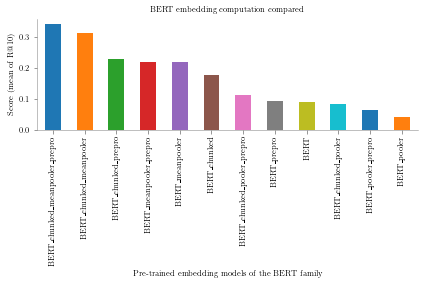

In [80]:
latexify()
ax = df.plot(kind='bar', y='metric', title='Embeddings compared', figsize=(6,4),
        color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11'])
plt.xticks(np.arange(len(df.Name)), list(df.Name), rotation=90);
ax.get_legend().remove()
ax.set_xlabel("Pre-trained embedding models of the BERT family")
ax.set_ylabel("Score (mean of R@10)")
ax.set_title("BERT embedding computation compared")
plt.tight_layout()
format_axes(ax)
plt.savefig("emb_models_compared.pdf")

In [81]:
df = pd.read_csv('wandb_export_2022-03-21T11_58_34.256+01_00.csv', usecols=['Name', 'val/text_to_image_R@1', 'val/text_to_image_R@5', 'val/text_to_image_R@10'])
df

,Name,val/text_to_image_R@1,val/text_to_image_R@10,val/text_to_image_R@5
0,SentVec default,0.259039,0.668173,0.535918
1,GPT-2 chunked meanpooler prepro2,0.165081,0.517602,0.390580
2,SentenceTransformer chunked prepro,0.128687,0.446717,0.330162
3,CliBERT_2m_chunked_meanpooler_prepro,0.124643,0.439819,0.316127
4,BioBERT_chunked_meanpooler_prepro,0.102521,0.413654,0.293530
5,PubMedBERT_chunked_meanpooler_prepro,0.097526,0.383682,0.272598
6,RoBERTa_chunked_meanpooler_prepro,0.093720,0.375357,0.260466
7,BERT_chunked_meanpooler_prepro,0.084443,0.342769,0.239058
8,Doc2Vec prepro,0.072074,0.307326,0.218126
9,BioELECTRA_chunked_meanpooler_prepro,0.013559,0.090866,0.051618


In [82]:
# wandb_export_2022-03-21T11_58_34.256+01_00.csv
df = pd.read_csv('wandb_export_2022-05-17T18_28_47.568+02_00.csv',
                 usecols=['Name', 'val/text_to_image_R@1', 'val/text_to_image_R@5', 'val/text_to_image_R@10',
                         'val/image_to_text_R@1', 'val/image_to_text_R@5', 'val/image_to_text_R@10'])

df['R@10'] = (df['val/image_to_text_R@10'] + df['val/text_to_image_R@10'])/2
df['R@5'] = (df['val/image_to_text_R@5'] + df['val/text_to_image_R@5'])/2
df['R@1'] = (df['val/image_to_text_R@1'] + df['val/text_to_image_R@1'])/2

df = df[['Name', 'R@1', 'R@5', 'R@10']]
df.columns = ['model', 'R@1', 'R@5', 'R@10']

# remove atributes
#df['model'] = df['model'].str.split(pat='_', n=1, expand=False).str[0]
#df['model'] = df['model'].str.split(pat=' ', n=1, expand=False).str[0]

df

,model,R@1,R@5,R@10
0,Sent2Vec,0.252854,0.531637,0.661394
1,Sent2Vec Ablation: chart events & discharge notes,0.187797,0.428520,0.550071
2,GPT-2,0.163297,0.392245,0.516413
3,SentenceTransformer,0.131779,0.328616,0.441960
4,CliBERT,0.122146,0.315176,0.438749
5,"Sent2Vec Ablation: no chart events, non-discha...",0.154971,0.333492,0.416984
6,BioBERT,0.105614,0.295195,0.409729
7,PubMedBERT,0.099905,0.275214,0.383325
8,RoBERTa,0.093958,0.263559,0.374049
9,BERT (baseline),0.087060,0.240604,0.342293


In [83]:
print(df.sort_values(by='R@10', ascending=False).to_latex())

\begin{tabular}{llrrr}
\toprule
{} &                                              model &       R@1 &       R@5 &      R@10 \\
\midrule
0  &                                           Sent2Vec &  0.252854 &  0.531637 &  0.661394 \\
1  &  Sent2Vec Ablation: chart events \& discharge notes &  0.187797 &  0.428520 &  0.550071 \\
2  &                                              GPT-2 &  0.163297 &  0.392245 &  0.516413 \\
3  &                                SentenceTransformer &  0.131779 &  0.328616 &  0.441960 \\
4  &                                            CliBERT &  0.122146 &  0.315176 &  0.438749 \\
5  &  Sent2Vec Ablation: no chart events, non-discha... &  0.154971 &  0.333492 &  0.416984 \\
6  &                                            BioBERT &  0.105614 &  0.295195 &  0.409729 \\
7  &                                         PubMedBERT &  0.099905 &  0.275214 &  0.383325 \\
8  &                                            RoBERTa &  0.093958 &  0.263559 &  0.374049 \\
9  &    

In [84]:
print(df.sort_values(by='R@10', ascending=False).to_markdown())

|    | model                                                                |        R@1 |        R@5 |       R@10 |
|---:|:---------------------------------------------------------------------|-----------:|-----------:|-----------:|
|  0 | Sent2Vec                                                             | 0.252854   | 0.531637   | 0.661394   |
|  1 | Sent2Vec Ablation: chart events & discharge notes                    | 0.187797   | 0.42852    | 0.550071   |
|  2 | GPT-2                                                                | 0.163297   | 0.392245   | 0.516413   |
|  3 | SentenceTransformer                                                  | 0.131779   | 0.328616   | 0.44196    |
|  4 | CliBERT                                                              | 0.122146   | 0.315176   | 0.438749   |
|  5 | Sent2Vec Ablation: no chart events, non-discharge vs discharge notes | 0.154971   | 0.333492   | 0.416984   |
|  6 | BioBERT                                                  

In [85]:
# df.drop(df['model'].str.contains('Mel'))

df = df[~df['model'].str.contains('Ablation')]

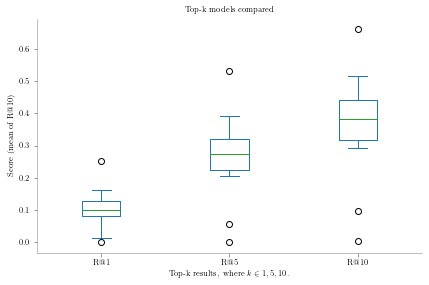

In [89]:
latexify()
ax = df.plot(kind='box', figsize=(6,4))
# ax.get_legend().remove()
ax.set_xlabel("Top-k results, where $k \in {1,5,10}.$")
ax.set_ylabel("Score (mean of R@10)")
ax.set_title("Top-k models compared")
plt.tight_layout()
format_axes(ax)
plt.savefig("topk_compared.pdf")

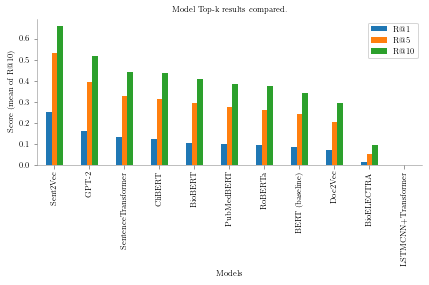

In [90]:
ax = df.plot(kind='bar', figsize=(6,4))
plt.xticks(np.arange(len(df.model)), list(df.model), rotation=90);
# ax.get_legend().remove()
ax.set_xlabel("Models")
ax.set_ylabel("Score (mean of R@10)")
ax.set_title("Model Top-k results compared.")
plt.tight_layout()
format_axes(ax)
plt.savefig("models_topk_compared.pdf")